# Problem set 2

- Below are the functions necessary to complete problem set 2

## A.1 Import data set

In [1]:
df = read.csv('demo.csv')
head(df,3)

country,polity2,gdp,regime,wealth
US,10,18054,3,3
CANADA,10,17173,3,3
DOMIN REP,6,2166,3,2


## A.2 Import packages

In [2]:
library(dplyr) #Data manipulation
library(ggplot2) #Plotting


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### A.2.1 Common mistake!--Confirm you have installed libraries
- Usually you only have to do this once!


In [3]:
#install.packages('dplyr')
#install.packages('ggplot2')

# 1. Scatterplot

- `PS2 corresponding problem: 2c`

## 1.1 Scatter: plot function
- `Function:`plot(x= df$\mathit{\$}$column1, y=, df$\mathit{\$}$column2, ...)

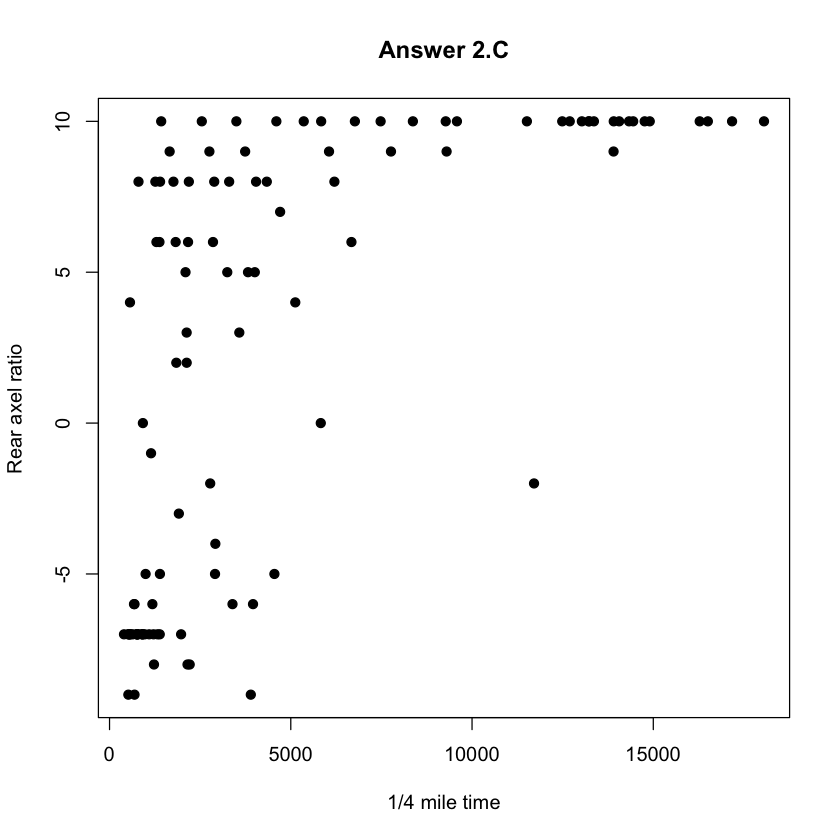

In [4]:
plot(df$gdp, #x
     df$polity2, #y
     xlab="1/4 mile time", 
     ylab="Rear axel ratio",
     main="Answer 2.C",
     pch=19 #Sets dot
    )

## 1.2 Scatter: ggplot library (Optional)

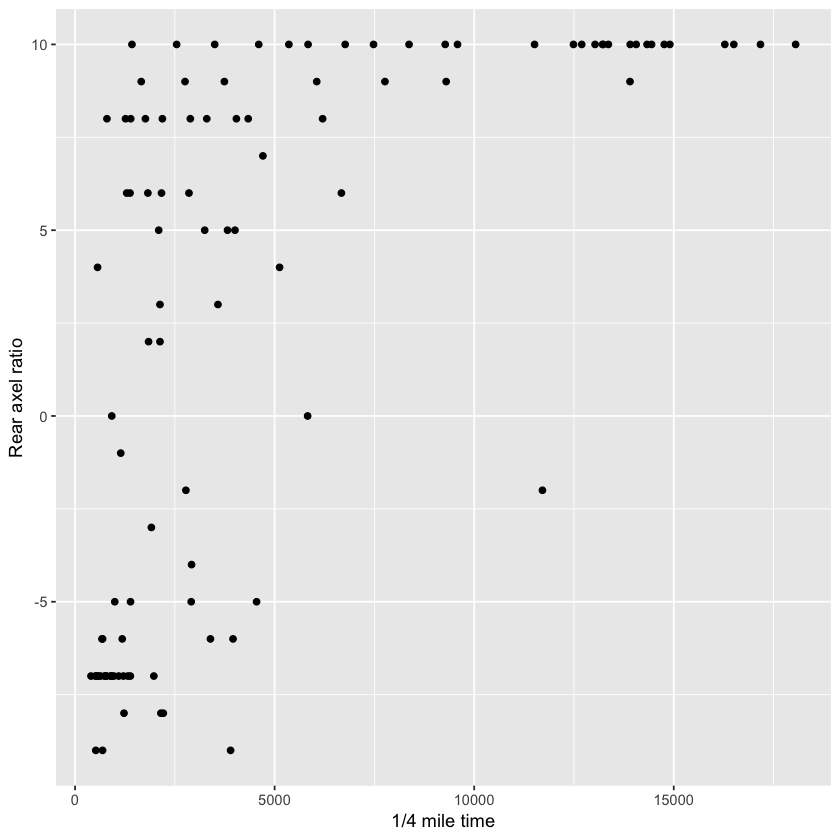

In [5]:
df %>% 
ggplot(
    aes(x = gdp, y = polity2)
)+
geom_point() + #Places points on chart
xlab('1/4 mile time') + 
ylab('Rear axel ratio') 

# 2. Correlation

- `PS2 corresponding problem: 2d`

## 2.1. Correlation: cor function
- `Function:`corr(df$\mathit{\$}$column1, df$\mathit{\$}$column2)

In [6]:
cor(df$gdp, df$wealth)

[1] 0.8721116

## 2.2 Correlation: DPLYR--select (Optional)

In [7]:
df %>% 
select(gdp, wealth) %>% 
cor()

,gdp,wealth
gdp,1.0000000,0.8721116
wealth,0.8721116,1.0000000


# 3. Histograms and filter

- `PS2 corresponding problem: 2e`

In [8]:
autocracy_df = df[df$regime==1,]
democracy_df = df[df$regime==3,]

In [9]:
autocracy_df %>% head(2) #This is how to use the head function with DPLYR

#You can also use head(autocracy_df)

,country,polity2,gdp,regime,wealth
15,GUYANA,-7,1094,1,1
46,GUINEA-B'AU,-6,689,1,1


## 3.2 Filter--DPLYR (Optional)

In [10]:
df %>% 
filter(regime==1)  %>% 
head(2)

country,polity2,gdp,regime,wealth
GUYANA,-7,1094,1,1
GUINEA-B'AU,-6,689,1,1


### 3.2.1 Saving new df with DPLYR

In [11]:
#Same code as above we just add the new name and equals sign
autocracy_df = 
df %>% 
filter(regime==1) 

## 3.2 Histograms

### 3.2.1 Histogram: hist function
- `Function:`hist(df$\mathit{\$}$column1)

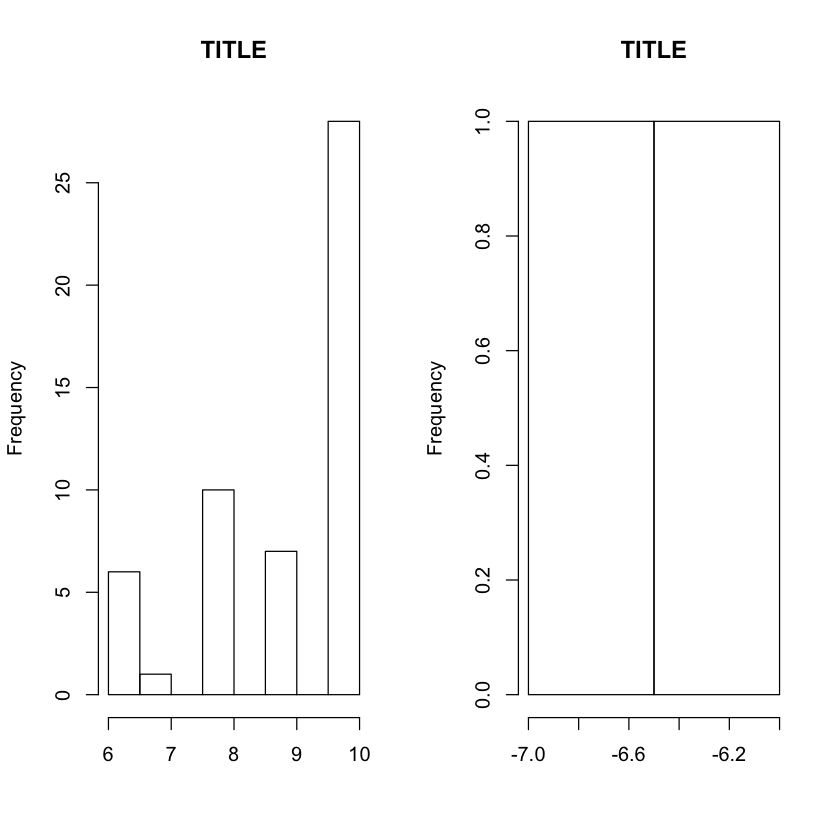

In [12]:
par(mfrow=c(1,2))
hist(democracy_df$polity2, xlab="", main="TITLE")
hist(autocracy_df$polity2, xlab="", main="TITLE")

### 3.2.2 Histogram: ggplot2--extragrid libraries (Optional)
- Install gridextra

In [13]:
#install.packages('gridExtra')
library(gridExtra)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [14]:
plot1 = democracy_df %>% 
ggplot(aes(x=polity2)) +  # x = Column_name
geom_histogram(color="black", fill="white", bins=2)

In [15]:
plot2 = autocracy_df %>% 
ggplot(aes(x=polity2)) +  # x = Column_name
geom_histogram(color="black", fill="white", bins=3)

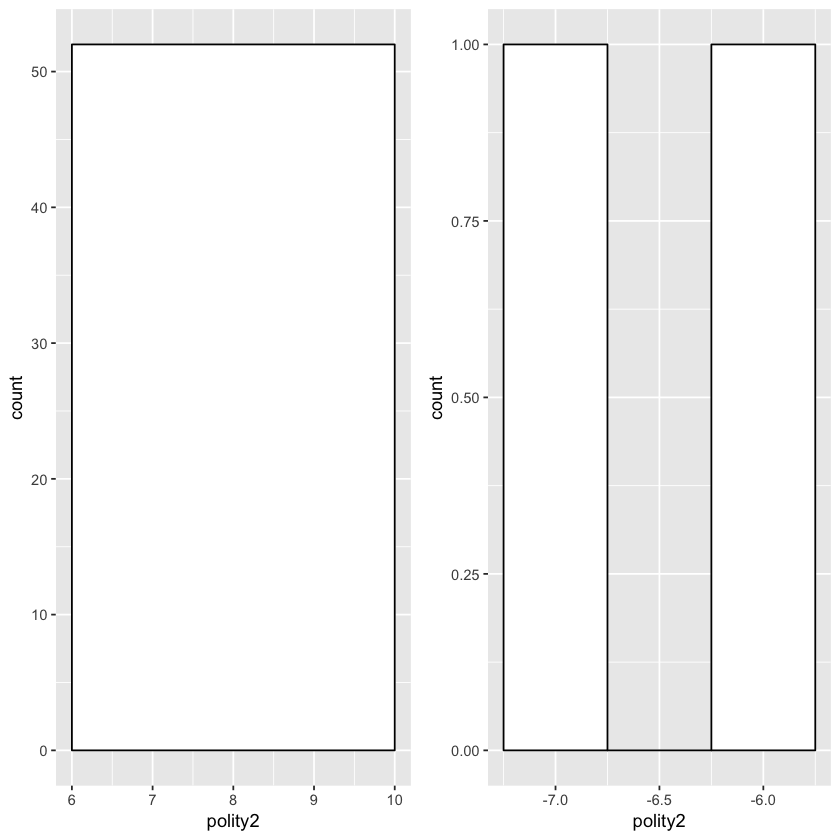

In [16]:
grid.arrange(plot1, plot2, ncol=2)

# 4. Two-way table

- `PS2 corresponding problem: 2f, 2g`

## 4.1 Two-way table: table function
- `Function:` table(df$\mathit{\$}$column1, df$\mathit{\$}$column2)
    - Note the output is: table(row, column)

In [17]:
freq_table = table(df$wealth, df$regime) #(col, row)
freq_table 

   
     1  2  3
  1 26  5  6
  2  6 15 20
  3  0  1 26

### 4.1.1 Rename columns and rows
- `PS2 corresponding problem: 2f`

In [18]:
rownames(freq_table) = c('1 Gear', '2 Gear', '3 Gear')

In [19]:
colnames(freq_table) = c('col1', 'col2', 'col3')

In [20]:
freq_table

        
         col1 col2 col3
  1 Gear   26    5    6
  2 Gear    6   15   20
  3 Gear    0    1   26

## 4.2 Percentage of total observations
- `PS2 corresponding problem: 2g`

In [21]:
prop.table(freq_table)

        
               col1       col2       col3
  1 Gear 0.24761905 0.04761905 0.05714286
  2 Gear 0.05714286 0.14285714 0.19047619
  3 Gear 0.00000000 0.00952381 0.24761905

## 4.3 Percentage of column observations
- `PS2 corresponding problem: 2g`

In [22]:
prop.table(freq_table,2)

        
               col1       col2       col3
  1 Gear 0.81250000 0.23809524 0.11538462
  2 Gear 0.18750000 0.71428571 0.38461538
  3 Gear 0.00000000 0.04761905 0.50000000

## 4.4 Two-way table: DPLYR


In [25]:
df  %>% 
select(regime, wealth) %>% table()

      wealth
regime  1  2  3
     1 26  6  0
     2  5 15  1
     3  6 20 26

In [26]:
df  %>% 
select(regime, wealth) %>% 
table() %>% 
prop.table()

      wealth
regime          1          2          3
     1 0.24761905 0.05714286 0.00000000
     2 0.04761905 0.14285714 0.00952381
     3 0.05714286 0.19047619 0.24761905